In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/HR_Dataset.csv")

In [ ]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
df.shape

(14999, 10)

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# Renaming column names
df.rename(columns={'Departments ':'Departments'},inplace=True)

In [ ]:
#overall stats of dataset
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# Check null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [ ]:
# Check duplicate values
df.duplicated().any()

True

In [ ]:
# count of duplicate values
df.duplicated().sum()

3008

In [ ]:
#drop duplicate values
df=df.drop_duplicates()

In [ ]:
df.shape

(11991, 10)

In [ ]:
df['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

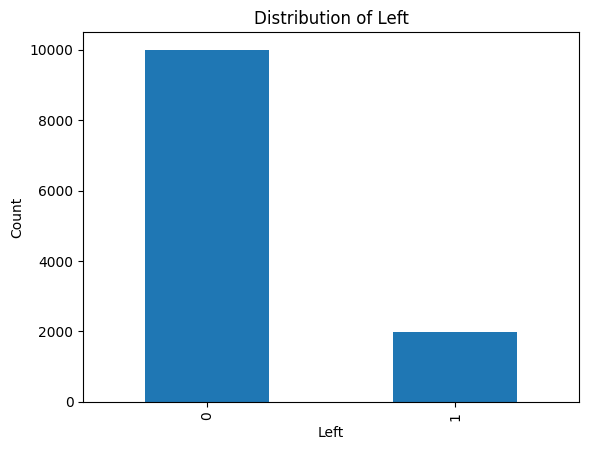

In [ ]:
# check distribution of left

import matplotlib.pyplot as plt

# Create a bar chart of the "left" column
df['left'].value_counts().plot(kind='bar')

# Add title and axis labels
plt.title('Distribution of Left')
plt.xlabel('Left')
plt.ylabel('Count')

# Show the plot
plt.show()


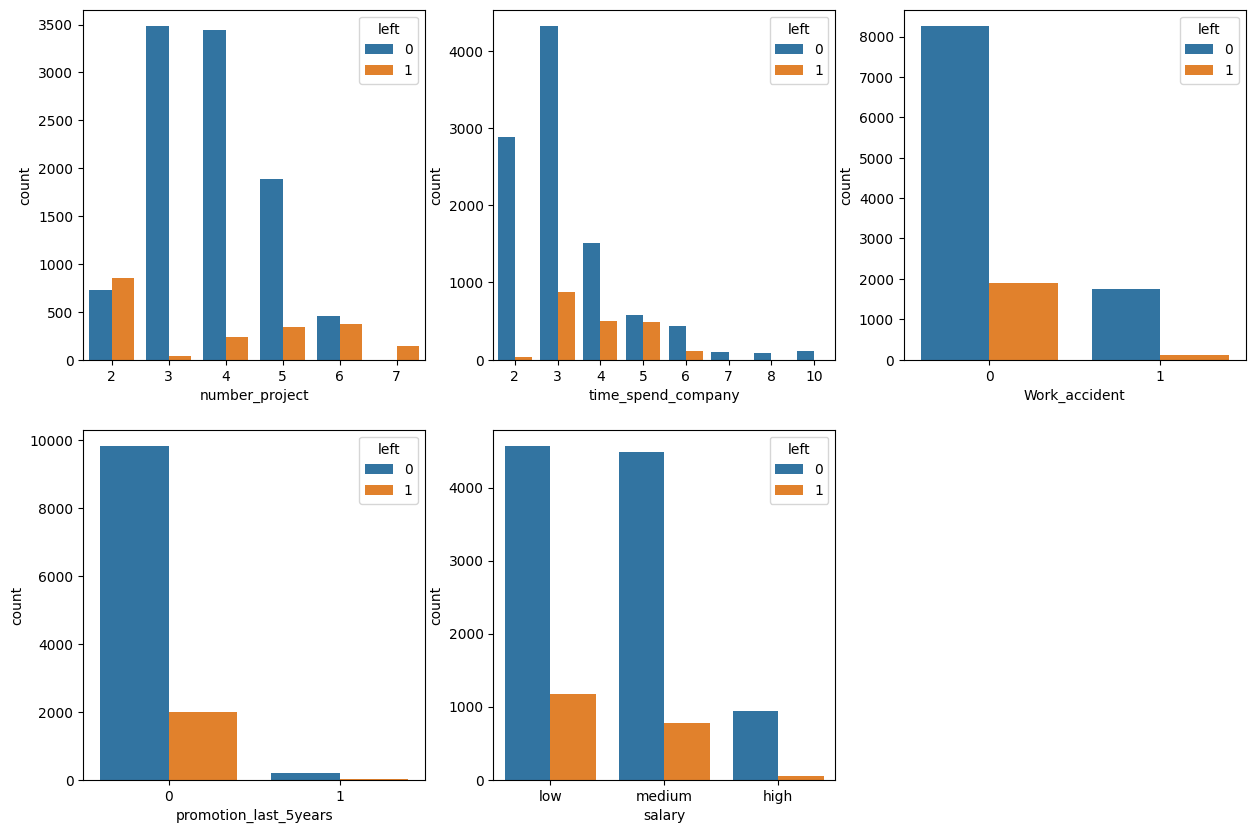

In [ ]:
#  subplots for 	number_project,  time_spend_company,  Work_accident , promotion_last_5years, salary add hue also and i dont want any blank plot

import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Subplot 1: number_project
sns.countplot(ax=axes[0, 0], data=df, x="number_project", hue="left")

# Subplot 2: time_spend_company
sns.countplot(ax=axes[0, 1], data=df, x="time_spend_company", hue="left")

# Subplot 3: Work_accident
sns.countplot(ax=axes[0, 2], data=df, x="Work_accident", hue="left")

# Subplot 4: promotion_last_5years
sns.countplot(ax=axes[1, 0], data=df, x="promotion_last_5years", hue="left")

# Subplot 5: salary
sns.countplot(ax=axes[1, 1], data=df, x="salary", hue="left")

# Hide empty subplot
fig.delaxes(axes[1, 2])

# Show the plot
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']])

# Transform the data
df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']] = scaler.transform(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']])


In [ ]:
# prompt: use nominal one hot encoder for departments

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
ohe = OneHotEncoder(drop='first', sparse=False)

# Fit the encoder to the data
ohe.fit(df[['Departments']])

# Transform the data
df = pd.concat([df, pd.DataFrame(ohe.transform(df[['Departments']]), columns=ohe.get_feature_names_out())], axis=1)

# Drop the original 'Departments' column
df.drop('Departments', axis=1, inplace=True)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:

from sklearn.preprocessing import OrdinalEncoder

# Create an instance of the OrdinalEncoder
oe = OrdinalEncoder()

# Fit the encoder to the data
oe.fit(df[['salary']])

# Transform the data
df['salary'] = oe.transform(df[['salary']])


In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Departments_RandD,Departments_accounting,Departments_hr,Departments_management,Departments_marketing,Departments_product_mng,Departments_sales,Departments_support,Departments_technical
0,-1.035668,-1.108990,-1.549921,-0.892208,-0.274291,-0.427116,1.0,-0.131228,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.706637,0.851380,1.029194,1.262709,1.981036,-0.427116,1.0,-0.131228,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-2.155721,0.970190,2.748604,1.467939,0.477485,-0.427116,1.0,-0.131228,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.374770,0.910785,1.029194,0.462311,1.229261,-0.427116,1.0,-0.131228,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.077151,-1.168396,-1.549921,-0.851162,-0.274291,-0.427116,1.0,-0.131228,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Departments_RandD,Departments_accounting,Departments_hr,Departments_management,Departments_marketing,Departments_product_mng,Departments_sales,Departments_support,Departments_technical
1461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df.isnull().sum()

satisfaction_level         9
last_evaluation            9
number_project             9
average_montly_hours       9
time_spend_company         9
Work_accident              9
left                       9
promotion_last_5years      9
salary                     9
Departments_RandD          9
Departments_accounting     9
Departments_hr             9
Departments_management     9
Departments_marketing      9
Departments_product_mng    9
Departments_sales          9
Departments_support        9
Departments_technical      9
dtype: int64

In [ ]:
# prompt: drop null

df = df.dropna()


In [ ]:
X = df.drop(columns=['left'])

In [ ]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Departments_RandD,Departments_accounting,Departments_hr,Departments_management,Departments_marketing,Departments_product_mng,Departments_sales,Departments_support,Departments_technical
0,-1.035668,-1.108990,-1.549921,-0.892208,-0.274291,-0.427116,-0.131228,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.706637,0.851380,1.029194,1.262709,1.981036,-0.427116,-0.131228,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-2.155721,0.970190,2.748604,1.467939,0.477485,-0.427116,-0.131228,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.374770,0.910785,1.029194,0.462311,1.229261,-0.427116,-0.131228,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.077151,-1.168396,-1.549921,-0.851162,-0.274291,-0.427116,-0.131228,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,-0.620833,-1.287206,1.029194,-1.200053,0.477485,-0.427116,-0.131228,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11987,-1.823854,0.435544,0.169489,0.585449,0.477485,-0.427116,-0.131228,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11988,-0.579350,-1.346611,-0.690216,-1.979928,2.732812,-0.427116,-0.131228,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11989,1.121472,0.257328,-0.690216,1.119048,2.732812,-0.427116,-0.131228,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
y = df['left']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score,precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8377138089278264
Precision: 0.5276073619631901
Recall: 0.21608040201005024


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier object
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)

print("Decision Tree Results:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)

Decision Tree Results:
Accuracy: 0.9703796412181894
Precision: 0.8997555012224939
Recall: 0.9246231155778895


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf_model = RandomForestClassifier()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

print("Random Forest Results:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)

Random Forest Results:
Accuracy: 0.98456403838131
Precision: 0.9839142091152815
Recall: 0.9221105527638191


In [ ]:
#  make a dataframe of the results of all models


models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy, accuracy_dt, accuracy_rf],
    'Precision': [precision, precision_dt, precision_rf],
    'Recall': [recall, recall_dt, recall_rf]
})

print(models.to_string())


                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.837714   0.527607  0.216080
1        Decision Tree  0.970380   0.899756  0.924623
2        Random Forest  0.984564   0.983914  0.922111


In [ ]:














#Based on the results, the Random Forest model achieved the highest accuracy, precision, and recall scores. Therefore, the Random Forest model is considered the best model among the three models evaluated.